# IMDB Rating Score Prediction

#### _Created on Sat May 11 15:07:14 2019_
#### _Author: Kang Li_
#### _Email: kohnlee1001@gmail.com_


## Introduction
The main point of this project is to practice my ability of Data Analysis and Machine Learning, I got this IMDB data online and found it is interesting, maybe we can use the information of a movie to predict its IMDB score before we watch it.
The metadata of movies in this dataset including movie name, information about actors, information about directors, language, movie year, budget, content rating, etc.
What I am trying to do is to perform a whole process of data analysis and the final goal is to build a machine learning model to predict scores of movies.

## **1. Importing**
### Importing the packages we need

In [1]:
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error 
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.base import BaseEstimator, RegressorMixin

### Importing dataset

In [2]:
IMDB = pd.read_csv('movie_metadata.csv')

## **2. EDA**
### Take a look at the dataset

In [3]:
IMDB.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

### Dealing with missing data
1. Removing rows with too many missing data 
2. Filling missing values of numerical columns with mathmatical mean of that column
3. Filling missing values of categorical columns with most frequent value

In [5]:
#Delete rows with 20% or more missing values
IMDB = IMDB.dropna(thresh=22)
IMDB=IMDB.reset_index(drop=True)
IMDB.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [6]:
#Etract numerical attributes
IMDB_numeric = IMDB.select_dtypes(exclude=['object'])

In [7]:
#Filling missing values with attribute mean
IMDB_numeric= IMDB_numeric.fillna(IMDB_numeric.mean())

In [8]:
#Merge filled data with original data
cols_to_use = IMDB.columns.difference(IMDB_numeric.columns)

In [9]:
IMDB = pd.concat([IMDB[cols_to_use],IMDB_numeric],axis=1)
IMDB['title_year'] = IMDB['title_year'].astype('int')

In [10]:
#Transform object data into category and fill missing values with most frequent value in each column
#Maybe we don't need to do that
for col in ['actor_1_name', 'actor_2_name', 'actor_3_name', 'color',
       'content_rating', 'country', 'director_name', 'genres', 'language',
       'movie_imdb_link', 'movie_title', 'plot_keywords']:
    IMDB[col]= IMDB[col].astype('category')
    IMDB[col]= IMDB[col].fillna(value = IMDB[col].value_counts().index[0])

In [11]:
IMDB.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5005.000000,5005.000000,5005.00000,5005.000000,5005.000000,5.005000e+03,5.005000e+03,5005.000000,5005.000000,5005.000000,5.005000e+03,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000
mean,140.858092,107.467855,688.52234,646.832066,6592.349850,4.851500e+07,8.427986e+04,9758.574426,1.372997,274.184822,3.983564e+07,2002.444955,1658.836898,6.437023,2.209396,7580.562238
std,121.094865,24.863758,2794.47805,1667.260149,15057.053537,6.238375e+07,1.388305e+05,18215.219675,2.013021,378.148880,1.965351e+08,12.378846,4051.318603,1.123578,1.285950,19383.317780
min,1.000000,7.000000,0.00000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,51.000000,93.000000,7.00000,134.000000,618.000000,8.378141e+06,8.983000e+03,1431.000000,0.000000,67.000000,7.000000e+06,1999.000000,282.000000,5.800000,1.850000,0.000000
50%,111.000000,104.000000,52.00000,373.000000,989.000000,3.697637e+07,3.477400e+04,3110.000000,1.000000,158.000000,2.300000e+07,2005.000000,596.000000,6.600000,2.209396,168.000000
75%,195.000000,118.000000,214.00000,637.000000,11000.000000,5.169745e+07,9.669300e+04,13827.000000,2.000000,327.000000,4.000000e+07,2011.000000,919.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.00000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


### Data preprocessing
#### 1. Check the distributions of numerical columns

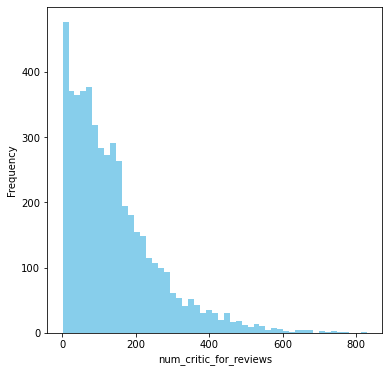

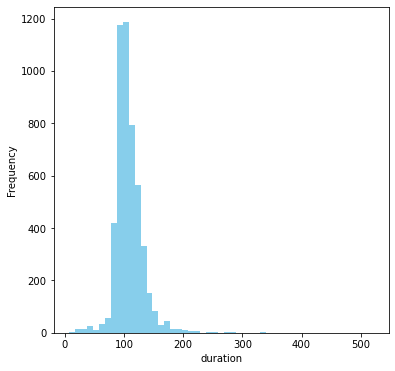

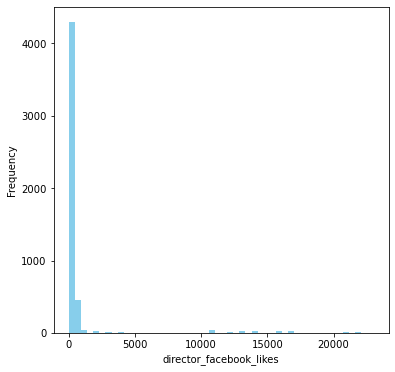

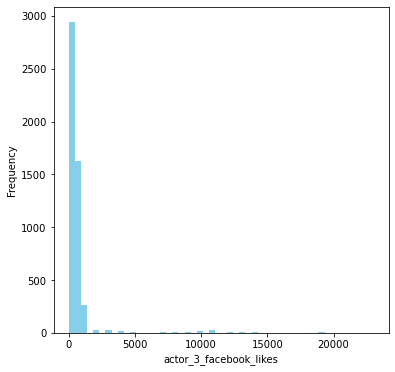

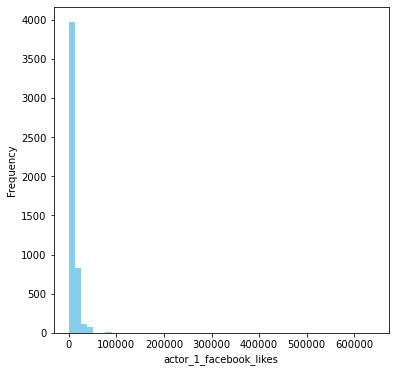

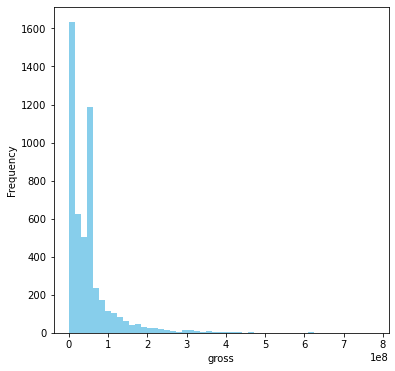

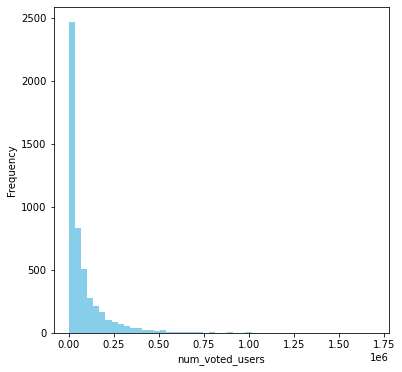

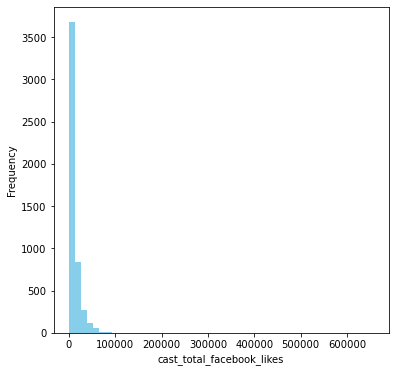

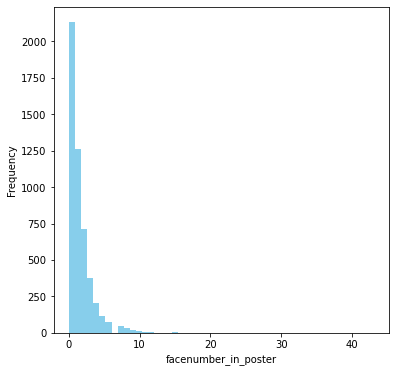

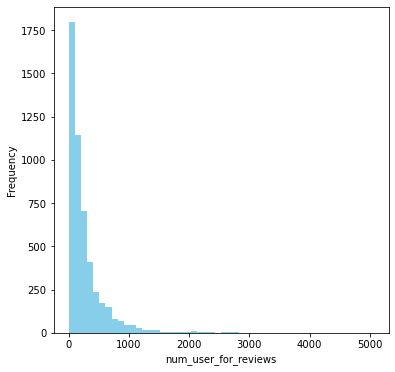

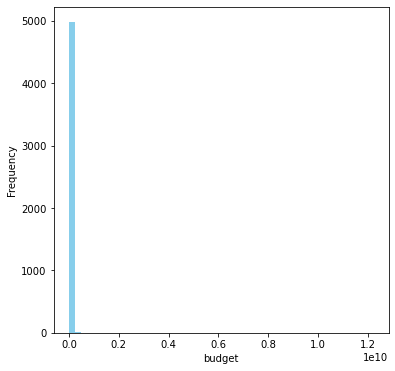

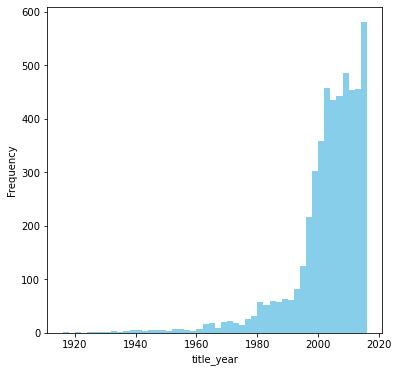

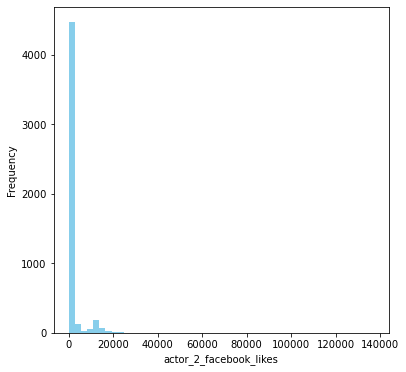

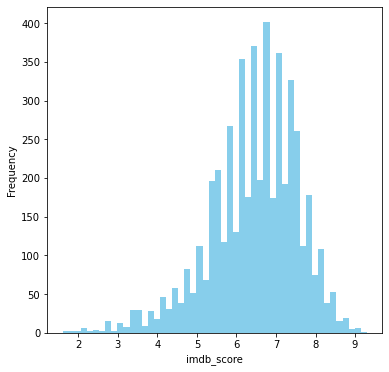

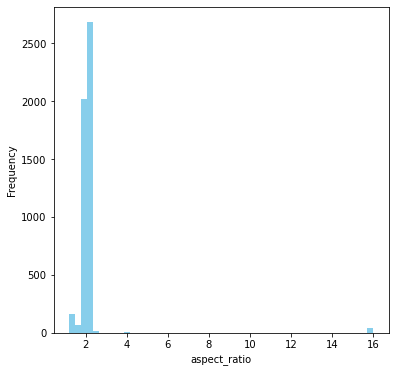

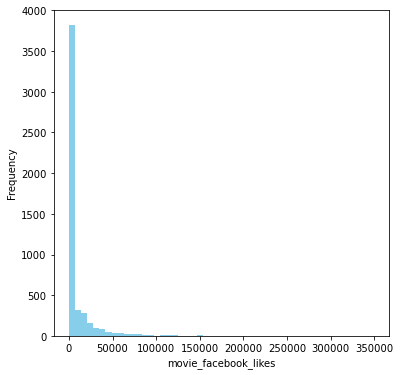

In [12]:
#Check distributions
for i in IMDB_numeric:
    plt.subplots(figsize=(6,6))
    data = IMDB_numeric[i]
    binwidth = (max(data) - min(data))/50
    plt.hist(data,bins=np.arange(min(data), max(data) + binwidth, binwidth), color='skyblue')
    plt.xlabel(str(i))
    plt.ylabel('Frequency')
    plt.show()

#### 2. Log transform high variance columns
Since we dont want some columns with high value and high variance take too much weight, we need to transform them, the way I choose here is log transform

In [13]:
#Find out columns with high variance
list_of_high_var=[]
for i in IMDB_numeric:
    v = IMDB_numeric[i].var()
    if v >= 10000:
        list_of_high_var.append(str(i))
    print(i,v)

num_critic_for_reviews 14663.966217967725
duration 618.2064529830149
director_facebook_likes 7809107.570452167
actor_3_facebook_likes 2779756.4048967077
actor_1_facebook_likes 226714861.20191854
gross 3891732279280785.5
num_voted_users 19273901733.17691
cast_total_facebook_likes 331794227.79846656
facenumber_in_poster 4.0522541902375995
num_user_for_reviews 142996.5756214015
budget 3.862606135912022e+16
title_year 153.23257084827628
actor_2_facebook_likes 16413182.421844281
imdb_score 1.262427986082679
aspect_ratio 1.6536676427417958
movie_facebook_likes 375713008.16863495


In [14]:
#Log transform high variance data
for a in list_of_high_var:
    IMDB[a]=np.log(IMDB[a]+1)

In [15]:
IMDB_numeric = IMDB.select_dtypes(exclude=['category'])
for i in IMDB_numeric:
    v = IMDB_numeric[i].var()
    print(i,v)

num_critic_for_reviews 1.2087534920980985
duration 618.2064529830149
director_facebook_likes 5.815590211159601
actor_3_facebook_likes 2.365448911526825
actor_1_facebook_likes 3.426317942544326
gross 4.692249914687606
num_voted_users 3.813444213793474
cast_total_facebook_likes 2.8868970618784457
facenumber_in_poster 4.0522541902375995
num_user_for_reviews 1.7734549095965138
budget 2.743931818858624
title_year 153.23582836028922
actor_2_facebook_likes 2.5652581194991697
imdb_score 1.262427986082679
aspect_ratio 1.6536676427417958
movie_facebook_likes 17.413522540566753


#### 3. Take a look of categorical columns

In [16]:
#Extract categorical columns
IMDB_category  = IMDB.select_dtypes(include=['category'])

In [17]:
for i in IMDB_category:
    print(i,len(IMDB_category[i].unique()))

actor_1_name 2075
actor_2_name 3010
actor_3_name 3503
color 2
content_rating 18
country 64
director_name 2386
genres 909
language 47
movie_imdb_link 4881
movie_title 4879
plot_keywords 4736


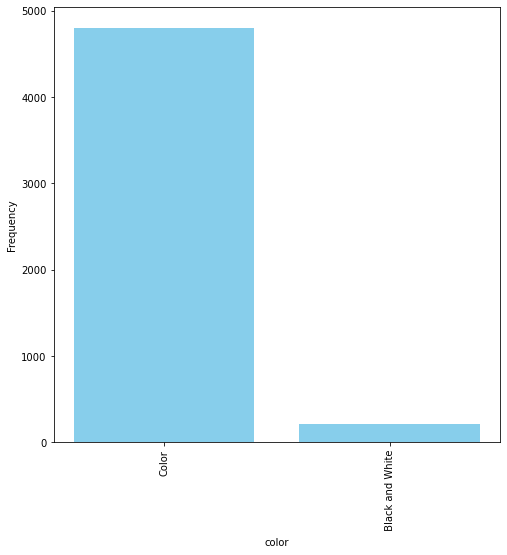

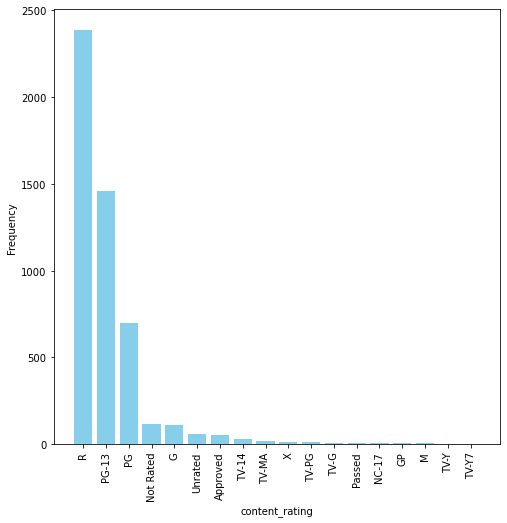

In [18]:
for i in ['color','content_rating']:
    plt.subplots(figsize=(8,8))
    D = IMDB_category[i].value_counts().to_dict()
    plt.bar(range(len(D)), list(D.values()), align='center',color  ='skyblue')
    plt.xticks(range(len(D)), list(D.keys()),rotation='vertical')
    plt.xlabel(str(i))
    plt.ylabel('Frequency')
    plt.show()

#### 4. Take a look of outliers

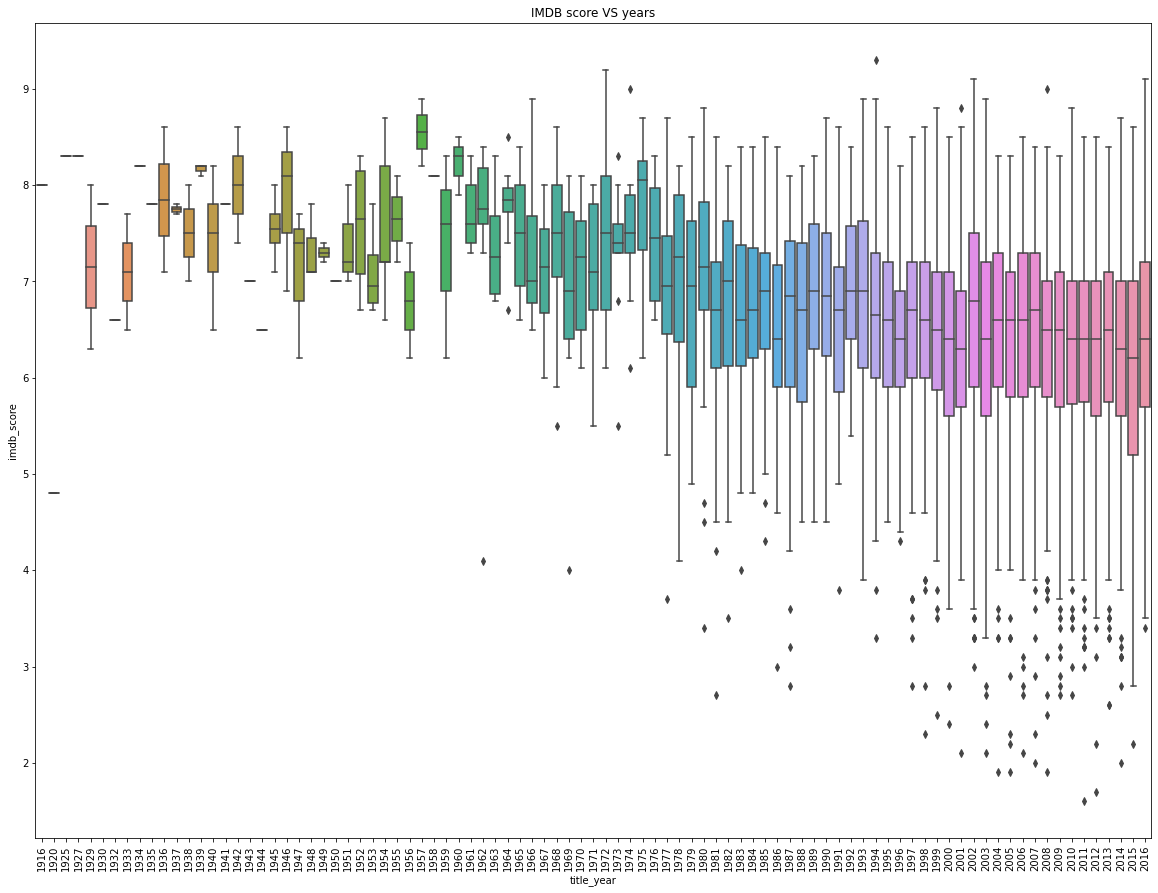

In [19]:
#Check for outliers
plt.subplots(figsize=(20,15))
sns.boxplot(x='title_year',y='imdb_score',data = IMDB).set_title('IMDB score VS years')
plt.xticks(rotation='vertical')
plt.ylabel('imdb_score')
plt.show()

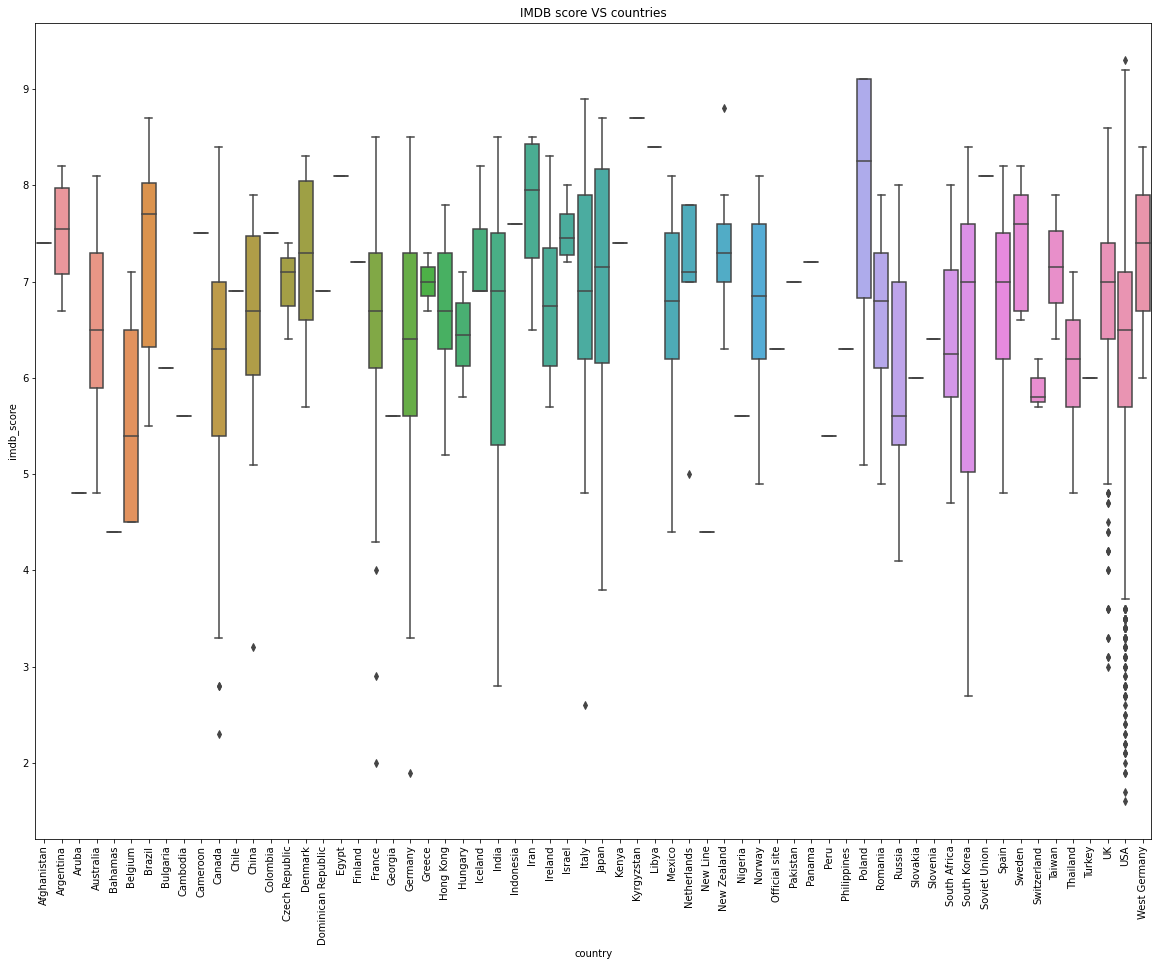

In [20]:
plt.subplots(figsize=(20,15))
sns.boxplot(x='country',y='imdb_score',data=IMDB).set_title('IMDB score VS countries')
plt.xticks(rotation='vertical')
plt.ylabel('imdb_score')
plt.show()

 We can observe that there is an outlier at year 1994 of USA with the highest score of IMDB ever, and it is not hard to know the name of that movie, The shawshank Redemption.

## 3. Feature Engineer
### Check Correlations

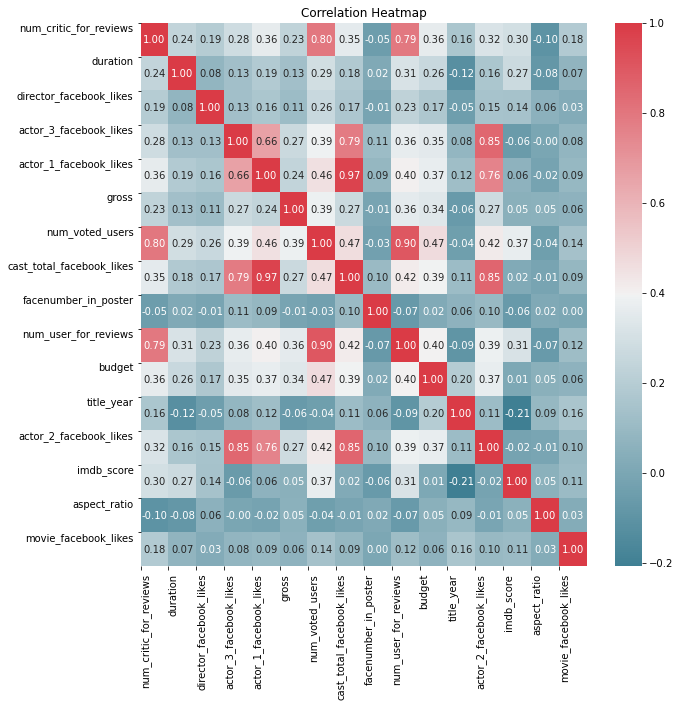

In [21]:
#Check correlations between numeric attributes
corr  = IMDB_numeric.corr()
plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f").set_title('Correlation Heatmap')
plt.xticks(range(len(corr.columns)), corr.columns, ha='left');
plt.yticks(range(len(corr.columns)), corr.columns, va='top');
plt.show()

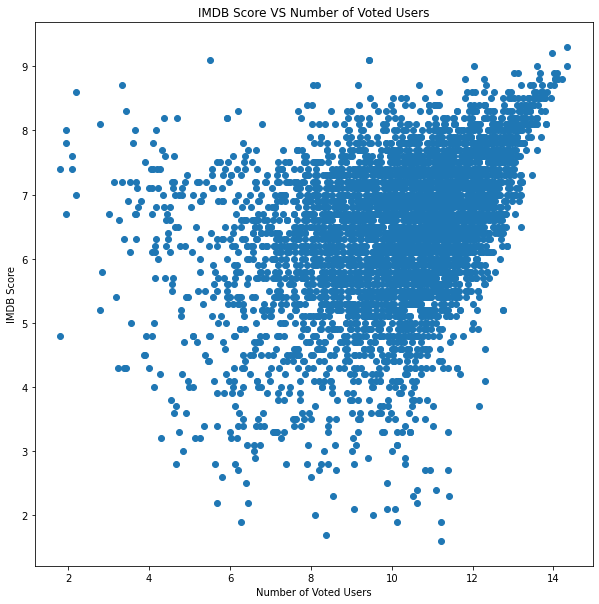

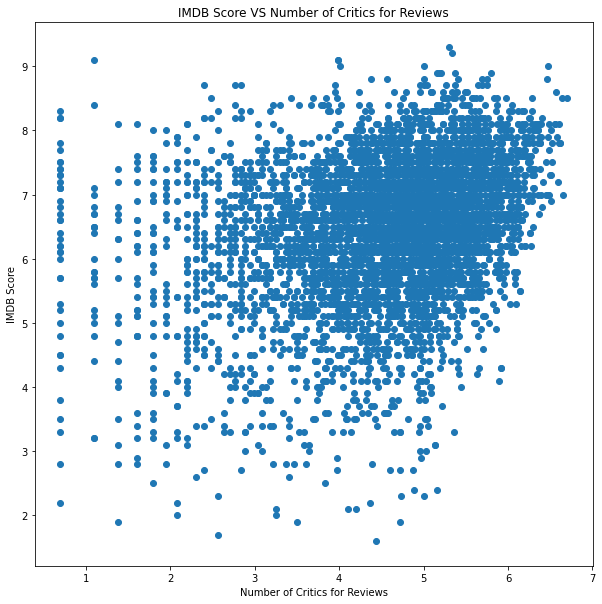

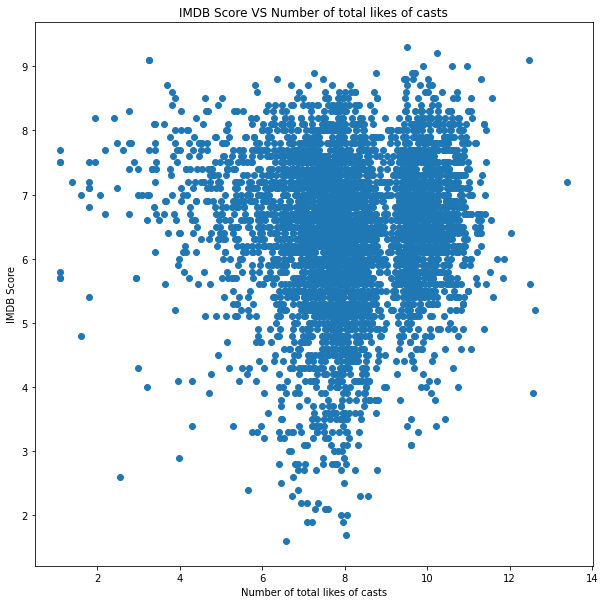

In [22]:
# Visualization of the relation between some attributes and imdb_score
plt.subplots(figsize=(10, 10))
plt.scatter(IMDB.num_voted_users,IMDB.imdb_score)
plt.title('IMDB Score VS Number of Voted Users')
plt.xlabel('Number of Voted Users')
plt.ylabel('IMDB Score')
plt.subplots(figsize=(10, 10))
plt.scatter(IMDB.num_critic_for_reviews,IMDB.imdb_score)
plt.title('IMDB Score VS Number of Critics for Reviews')
plt.xlabel('Number of Critics for Reviews')
plt.ylabel('IMDB Score')
plt.subplots(figsize=(10, 10))
plt.scatter(IMDB['cast_total_facebook_likes'][IMDB['cast_total_facebook_likes']>0],IMDB.imdb_score[IMDB['cast_total_facebook_likes']>0])
plt.title('IMDB Score VS Number of total likes of casts')
plt.xlabel('Number of total likes of casts')
plt.ylabel('IMDB Score')
plt.show()

From plots above, we can see some columns have high correlations with each other, such as `num_voted_user` and `num_critic_for_reviews`, `actor1_facevook_likes` and `cast_total_facebook_likes`, etc.\
\
This situation will lead to overweight of one factor, which means we need to deal with this problem when we are going to build up the model.

### Attributes filter
Obviously, the director and actors of a movie will affect the movie's IMDB score. But, if we think as a Data Scientist, the name of the actor is Robert Downey Jr. or Tom Cruise doesn't acturally affect how would the audience rate the movie, if Tom Cruise declares that he will change to another name, the rate of the movie will probably the same. So, what's really affecting the score of the movie is how many people like the director and the actors.\
\
For the reason above, I think to keep the attributes like numbers of facebook likes of actors and directors make more sense than keep the name of them.\
\
Also, I removed many meaningless columns such as movie's IMDB link `movie_imdb_link`, etc.

In [23]:
#Remove redundant attributes
#Drop director and actor names because we use number of facebook likes of them which makes more sense
#Remove movie title because it's the ID, remove imdb_link and plot_keywords because it's not related to rating
to_drop = ['actor_1_name','actor_2_name','actor_3_name','director_name','movie_title','movie_imdb_link','plot_keywords']
IMDB_dropped = IMDB.drop(to_drop,axis = 1)
IMDB_category =IMDB_category.drop(to_drop,axis = 1)

In [24]:
IMDB_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      5005 non-null   category
 1   content_rating             5005 non-null   category
 2   country                    5005 non-null   category
 3   genres                     5005 non-null   category
 4   language                   5005 non-null   category
 5   num_critic_for_reviews     5005 non-null   float64 
 6   duration                   5005 non-null   float64 
 7   director_facebook_likes    5005 non-null   float64 
 8   actor_3_facebook_likes     5005 non-null   float64 
 9   actor_1_facebook_likes     5005 non-null   float64 
 10  gross                      5005 non-null   float64 
 11  num_voted_users            5005 non-null   float64 
 12  cast_total_facebook_likes  5005 non-null   float64 
 13  facenumber_in_poster       5005 n

### Get dummy variables
To make categorical variables more useful in machine learning, one way is to tranform them into dummy variables, although this move will increse the dimension of our data.

In [25]:
#Transform categorical data to dummy variables
cate_dummy = pd.get_dummies(IMDB_category)
print(cate_dummy.shape)

(5005, 1040)


In [26]:
#Concate dummy variables with numberical variables
IMDB_dropped = IMDB_dropped.drop(IMDB_category,axis=1)
IMDB_dropped = pd.concat([IMDB_dropped,cate_dummy],axis=1)
IMDB_dropped.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,language_Slovenian,language_Spanish,language_Swahili,language_Swedish,language_Tamil,language_Telugu,language_Thai,language_Urdu,language_Vietnamese,language_Zulu
0,6.584791,178.0,0.000000,6.752270,6.908755,20.449494,13.694704,8.483636,0.0,8.024535,...,0,0,0,0,0,0,0,0,0,0
1,5.713733,169.0,6.335054,6.908755,10.596660,19.550159,13.063082,10.786242,0.0,7.122060,...,0,0,0,0,0,0,0,0,0,0
2,6.401917,148.0,0.000000,5.087596,9.305741,19.114199,12.527681,9.367430,1.0,6.902743,...,0,0,0,0,0,0,0,0,0,0
3,6.701960,164.0,9.998843,10.043293,10.203629,19.920595,13.950337,11.578339,0.0,7.901748,...,0,0,0,0,0,0,0,0,0,0
4,6.137727,132.0,6.165418,6.274762,6.463029,18.106774,12.265308,7.535830,1.0,6.605298,...,0,0,0,0,0,0,0,0,0,0


### PCA
After we convert our categorical variables into dummy, we increased our dimension, which may cause some problem and waste computation power during machine learning process. To solve this problem, we can utilize PCA to reduce the dimension of our data.

In [27]:
#Last step, PCA
y = IMDB_dropped['imdb_score']
IMDB_dropped = IMDB_dropped.drop('imdb_score',axis =1)
pca = PCA()
IMDB_PCA = pca.fit_transform(IMDB_dropped)
print(IMDB_PCA.shape)
print(pca.explained_variance_ratio_)

(5005, 1055)
[7.51523407e-01 1.82852240e-01 2.08404881e-02 ... 1.96958590e-38
 1.46782202e-38 4.05690510e-39]


## 4. Model Building
Because what we are preedicting here is a score, which means it is a continuous variable, we should use regression model. For here, I tried three type of regressions, linear regression, ridge regression, and LASSO.\
\
To decide which is the most appropriate one, we need to compare their cross vcalidation scores. In this case, I chose the negative mean squared error.

In [28]:
#End of preprocessing, prepare for regression
sk = linear_model
X_train, X_test, y_train, y_test = train_test_split(IMDB_PCA, y,test_size = 0.2)

In [29]:
# Frist model build on Generalized Linear Regression
class statsmodel(BaseEstimator, RegressorMixin):

    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)
score1 = cross_val_score(statsmodel(sm.GLM), X_train, y_train, cv = 10, scoring='neg_mean_squared_error')
print(score1)
print(score1.mean())

[-0.72975104 -0.63288536 -0.89480962 -0.84119    -0.7201229  -0.79984534
 -0.68355748 -0.69174078 -0.66608546 -0.78645733]
-0.7446445310947759


In [30]:
# Second model build on Ridge Regression
model2 = sk.Ridge(alpha=1)
score2 = cross_val_score(model2, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(score2)
print(score2.mean())

[-0.67734126 -0.60413834 -0.82617128 -0.79326162 -0.67727373 -0.73555032
 -0.66374181 -0.61799021 -0.63199764 -0.71372842]
-0.6941194626963881


In [31]:
# Last model build on LASSO
model3 = sk.Lasso(alpha=1)
score3 = cross_val_score(model3, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(score3)
print(score3.mean())

[-1.04511015 -1.08868048 -1.28950923 -1.17397941 -1.08162925 -1.12337312
 -1.13705438 -1.07082325 -1.00467205 -0.98562047]
-1.1000451771925055


#### Based on the cross validation score of each model, ridge regression model works the best. Maybe it's the best one in this case to be used for prediction

#### But we still need to verify the result by checking the performance on test set.

In [32]:
# Get predictions of all models based on test set
model1 = sm.GLM(y_train,X_train).fit()
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
y1 = model1.predict(X_test)
y2 = model2.predict(X_test)
y3 = model3.predict(X_test)
print(mean_squared_error(y1,y_test))
print(mean_squared_error(y2,y_test))
print(mean_squared_error(y3,y_test))

10059.661266919686
0.7938914389687368
1.2907036171033885


As what we observed here, Ridge Regression model has the best performance on test data, which means it's the best performer in this case.

## 5. Diagnostic
#### Although we found our best model thgrough the steps above, we still need to check if it is an appropriate model to use.
#### What we can do here is to check the diagnostic plots.

C:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


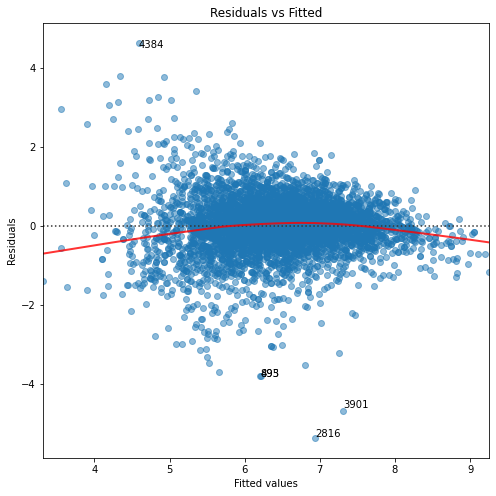

In [33]:
# Based on the cross validation score of each model, ridge regression model works the best
# Maybe it's the best one in this case to be used for prediction
# Check the residuals
model_fit = model2.fit(IMDB_PCA,y)
model_fitted_y = model2.predict(IMDB_PCA)
residuals = y - model_fitted_y
top5 = abs(residuals).sort_values(ascending = False)[:5]

df = pd.DataFrame({'model_fitted_y':model_fitted_y, 'y':y})

fig, ax = plt.subplots(figsize=(8, 8))
sns.residplot('model_fitted_y', 'y', data=df, lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

for i in top5.index:
    ax.annotate(i,xy=(model_fitted_y[i],residuals[i]))

plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');
plt.show()

#### Generally, our model seems good. There is no obvious bias distribution of residuals, except that for low rating movies.
#### But it makes sense somehow. Good movies will usually get high rating from most users, while low rating movies are always full of controversy.
#### If we look at the top5 movies which have high influences, we may find something

In [34]:
for i in top5.index:
    print(i,IMDB['movie_title'][i],IMDB['imdb_score'][i],model_fitted_y[i])

2816 Justin Bieber: Never Say Never  1.6 6.934811742366526
3901 The Real Cancun  2.7 7.313077446286541
4384 Kickboxer: Vengeance  9.1 4.588467755542553
493 Battlefield Earth  2.4 6.213211439526045
895 Gigli  2.4 6.20610585406223


#### As what we see here, 4 of the top5 wrong predicted movies are extreme low rating movies, but our model overated them, because we are trying to regress to the mean. 
#### For the movie *Kickboxer: Vengeance*, it says the score is 9.1 but our model is trying to underate it. I searched online and find it is a new movie came out at 2016. So, I think the reason is at the beginning, the movie got high score and the data was collected at that time. If we go to IMDB website, we will now find its score is only 4.9, which means our model actually did a great job here.